In [1]:
#conda install pandas matplotlib scikit-learn -y

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [4]:
train_df.dtypes

date     object
store     int64
item      int64
sales     int64
dtype: object

In [5]:
train_df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [6]:
test_df.tail()

,id,date,store,item
44995,44995,2018-03-27,10,50
44996,44996,2018-03-28,10,50
44997,44997,2018-03-29,10,50
44998,44998,2018-03-30,10,50
44999,44999,2018-03-31,10,50


In [7]:
train_df['trsin_or_test'] , test_df['trsin_or_test'] = 'train' , 'test'
data_df = pd.concat([train_df,test_df])
data_df.head()

,date,store,item,sales,trsin_or_test,id
0,2013-01-01,1,1,13.0,train,NaN
1,2013-01-02,1,1,11.0,train,NaN
2,2013-01-03,1,1,14.0,train,NaN
3,2013-01-04,1,1,13.0,train,NaN
4,2013-01-05,1,1,10.0,train,NaN


In [8]:
data_df['date'] = pd.to_datetime(data_df['date'])

In [9]:
data_df.dtypes

date             datetime64[ns]
store                     int64
item                      int64
sales                   float64
trsin_or_test            object
id                      float64
dtype: object

In [10]:
data_df['year'] = data_df['date'].dt.year
data_df['quarter'] = data_df['date'].dt.quarter
data_df['month'] = data_df['date'].dt.month
data_df['weekofyear'] = data_df['date'].dt.weekofyear
data_df['weekday'] = data_df['date'].dt.weekday
data_df['dayofweek'] = data_df['date'].dt.dayofweek

/home/chin/anaconda3/envs/snapml/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.


In [11]:
data_df.head(10)

,date,store,item,sales,trsin_or_test,id,year,quarter,month,weekofyear,weekday,dayofweek
0,2013-01-01,1,1,13.0,train,NaN,2013,1,1,1,1,1
1,2013-01-02,1,1,11.0,train,NaN,2013,1,1,1,2,2
2,2013-01-03,1,1,14.0,train,NaN,2013,1,1,1,3,3
3,2013-01-04,1,1,13.0,train,NaN,2013,1,1,1,4,4
4,2013-01-05,1,1,10.0,train,NaN,2013,1,1,1,5,5
5,2013-01-06,1,1,12.0,train,NaN,2013,1,1,1,6,6
6,2013-01-07,1,1,10.0,train,NaN,2013,1,1,2,0,0
7,2013-01-08,1,1,9.0,train,NaN,2013,1,1,2,1,1
8,2013-01-09,1,1,12.0,train,NaN,2013,1,1,2,2,2
9,2013-01-10,1,1,9.0,train,NaN,2013,1,1,2,3,3


In [12]:
data_df['item_quarter_mean'] = data_df.groupby(['quarter','item'])['sales'].transform('mean')

In [13]:
data_df.head()

,date,store,item,sales,trsin_or_test,id,year,quarter,month,weekofyear,weekday,dayofweek,item_quarter_mean
0,2013-01-01,1,1,13.0,train,NaN,2013,1,1,1,1,1,17.044789
1,2013-01-02,1,1,11.0,train,NaN,2013,1,1,1,2,2,17.044789
2,2013-01-03,1,1,14.0,train,NaN,2013,1,1,1,3,3,17.044789
3,2013-01-04,1,1,13.0,train,NaN,2013,1,1,1,4,4,17.044789
4,2013-01-05,1,1,10.0,train,NaN,2013,1,1,1,5,5,17.044789


In [14]:
data_df['store_quarter_mean'] = data_df.groupby(['quarter', 'store'])['sales'].transform('mean')
data_df['store_item_quarter_mean'] = data_df.groupby(['quarter', 'item', 'store'])['sales'].transform('mean')

In [15]:
data_df['item_month_mean'] = data_df.groupby(['month', 'item'])['sales'].transform('mean')
data_df['store_month_mean'] = data_df.groupby(['month', 'store'])['sales'].transform('mean')
data_df['store_item_month_mean'] = data_df.groupby(['month', 'item', 'store'])['sales'].transform('mean')

In [16]:
data_df['item_weekofyear_mean'] = data_df.groupby(['weekofyear', 'item'])['sales'].transform('mean')
data_df['store_weekofyear_mean'] = data_df.groupby(['weekofyear', 'store'])['sales'].transform('mean')
data_df['store_item_weekofyear_mean'] = data_df.groupby(['weekofyear', 'item', 'store'])['sales'].transform('mean')

In [17]:
data_df['itemweekday_mean'] = data_df.groupby(['weekday', 'item'])['sales'].transform('mean')
data_df['storeweekday_mean'] = data_df.groupby(['weekday', 'store'])['sales'].transform('mean')
data_df['storeitemweekday_mean'] = data_df.groupby(['weekday', 'item', 'store'])['sales'].transform('mean')

In [18]:
data_df.head()

,date,store,item,sales,trsin_or_test,id,year,quarter,month,weekofyear,...,store_item_quarter_mean,item_month_mean,store_month_mean,store_item_month_mean,item_weekofyear_mean,store_weekofyear_mean,store_item_weekofyear_mean,itemweekday_mean,storeweekday_mean,storeitemweekday_mean
0,2013-01-01,1,1,13.0,train,NaN,2013,1,1,1,...,15.334812,14.830323,32.174452,13.709677,15.038235,32.529412,13.970588,20.279693,43.559923,18.168582
1,2013-01-02,1,1,11.0,train,NaN,2013,1,1,1,...,15.334812,14.830323,32.174452,13.709677,15.038235,32.529412,13.970588,20.414176,43.838621,18.793103
2,2013-01-03,1,1,14.0,train,NaN,2013,1,1,1,...,15.334812,14.830323,32.174452,13.709677,15.038235,32.529412,13.970588,21.687356,46.731188,19.452107
3,2013-01-04,1,1,13.0,train,NaN,2013,1,1,1,...,15.334812,14.830323,32.174452,13.709677,15.038235,32.529412,13.970588,23.245594,49.841379,21.015326
4,2013-01-05,1,1,10.0,train,NaN,2013,1,1,1,...,15.334812,14.830323,32.174452,13.709677,15.038235,32.529412,13.970588,24.730268,53.129042,22.973180


In [19]:
data_df.tail()

,date,store,item,sales,trsin_or_test,id,year,quarter,month,weekofyear,...,store_item_quarter_mean,item_month_mean,store_month_mean,store_item_month_mean,item_weekofyear_mean,store_weekofyear_mean,store_item_weekofyear_mean,itemweekday_mean,storeweekday_mean,storeitemweekday_mean
44995,2018-03-27,10,50,NaN,test,44995.0,2018,1,3,13,...,57.736142,59.747742,53.158065,67.780645,61.417143,54.788571,68.771429,60.622989,54.180153,67.777778
44996,2018-03-28,10,50,NaN,test,44996.0,2018,1,3,13,...,57.736142,59.747742,53.158065,67.780645,61.417143,54.788571,68.771429,61.185824,54.288582,68.823755
44997,2018-03-29,10,50,NaN,test,44997.0,2018,1,3,13,...,57.736142,59.747742,53.158065,67.780645,61.417143,54.788571,68.771429,65.547126,58.119080,73.532567
44998,2018-03-30,10,50,NaN,test,44998.0,2018,1,3,13,...,57.736142,59.747742,53.158065,67.780645,61.417143,54.788571,68.771429,69.373946,62.082682,78.275862
44999,2018-03-31,10,50,NaN,test,44999.0,2018,1,3,13,...,57.736142,59.747742,53.158065,67.780645,61.417143,54.788571,68.771429,73.891188,65.829272,82.854406


In [20]:
data_df.isnull().sum()

date                               0
store                              0
item                               0
sales                          45000
trsin_or_test                      0
id                            913000
year                               0
quarter                            0
month                              0
weekofyear                         0
weekday                            0
dayofweek                          0
item_quarter_mean                  0
store_quarter_mean                 0
store_item_quarter_mean            0
item_month_mean                    0
store_month_mean                   0
store_item_month_mean              0
item_weekofyear_mean               0
store_weekofyear_mean              0
store_item_weekofyear_mean         0
itemweekday_mean                   0
storeweekday_mean                  0
storeitemweekday_mean              0
dtype: int64

## Model Predection

In [21]:
data_df.shape

(958000, 24)

In [22]:
data_df.columns

Index(['date', 'store', 'item', 'sales', 'trsin_or_test', 'id', 'year',
       'quarter', 'month', 'weekofyear', 'weekday', 'dayofweek',
       'item_quarter_mean', 'store_quarter_mean', 'store_item_quarter_mean',
       'item_month_mean', 'store_month_mean', 'store_item_month_mean',
       'item_weekofyear_mean', 'store_weekofyear_mean',
       'store_item_weekofyear_mean', 'itemweekday_mean', 'storeweekday_mean',
       'storeitemweekday_mean'],
      dtype='object')

In [23]:
data_df.drop(['date','id','sales'],axis=1,inplace=True)

In [24]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 958000 entries, 0 to 44999
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   store                       958000 non-null  int64  
 1   item                        958000 non-null  int64  
 2   trsin_or_test               958000 non-null  object 
 3   year                        958000 non-null  int64  
 4   quarter                     958000 non-null  int64  
 5   month                       958000 non-null  int64  
 6   weekofyear                  958000 non-null  int64  
 7   weekday                     958000 non-null  int64  
 8   dayofweek                   958000 non-null  int64  
 9   item_quarter_mean           958000 non-null  float64
 10  store_quarter_mean          958000 non-null  float64
 11  store_item_quarter_mean     958000 non-null  float64
 12  item_month_mean             958000 non-null  float64
 13  store_month_mea

In [25]:
x= data_df[data_df['trsin_or_test'] == 'train']#.dropna().drop(['id', 'sales', 'trsin_or_test', 'date'], axis=1)
test = data_df[data_df['trsin_or_test'] == 'train']#.dropna()['sales']

In [26]:
x.head()

,store,item,trsin_or_test,year,quarter,month,weekofyear,weekday,dayofweek,item_quarter_mean,...,store_item_quarter_mean,item_month_mean,store_month_mean,store_item_month_mean,item_weekofyear_mean,store_weekofyear_mean,store_item_weekofyear_mean,itemweekday_mean,storeweekday_mean,storeitemweekday_mean
0,1,1,train,2013,1,1,1,1,1,17.044789,...,15.334812,14.830323,32.174452,13.709677,15.038235,32.529412,13.970588,20.279693,43.559923,18.168582
1,1,1,train,2013,1,1,1,2,2,17.044789,...,15.334812,14.830323,32.174452,13.709677,15.038235,32.529412,13.970588,20.414176,43.838621,18.793103
2,1,1,train,2013,1,1,1,3,3,17.044789,...,15.334812,14.830323,32.174452,13.709677,15.038235,32.529412,13.970588,21.687356,46.731188,19.452107
3,1,1,train,2013,1,1,1,4,4,17.044789,...,15.334812,14.830323,32.174452,13.709677,15.038235,32.529412,13.970588,23.245594,49.841379,21.015326
4,1,1,train,2013,1,1,1,5,5,17.044789,...,15.334812,14.830323,32.174452,13.709677,15.038235,32.529412,13.970588,24.730268,53.129042,22.973180


In [27]:
test.head()

,store,item,trsin_or_test,year,quarter,month,weekofyear,weekday,dayofweek,item_quarter_mean,...,store_item_quarter_mean,item_month_mean,store_month_mean,store_item_month_mean,item_weekofyear_mean,store_weekofyear_mean,store_item_weekofyear_mean,itemweekday_mean,storeweekday_mean,storeitemweekday_mean
0,1,1,train,2013,1,1,1,1,1,17.044789,...,15.334812,14.830323,32.174452,13.709677,15.038235,32.529412,13.970588,20.279693,43.559923,18.168582
1,1,1,train,2013,1,1,1,2,2,17.044789,...,15.334812,14.830323,32.174452,13.709677,15.038235,32.529412,13.970588,20.414176,43.838621,18.793103
2,1,1,train,2013,1,1,1,3,3,17.044789,...,15.334812,14.830323,32.174452,13.709677,15.038235,32.529412,13.970588,21.687356,46.731188,19.452107
3,1,1,train,2013,1,1,1,4,4,17.044789,...,15.334812,14.830323,32.174452,13.709677,15.038235,32.529412,13.970588,23.245594,49.841379,21.015326
4,1,1,train,2013,1,1,1,5,5,17.044789,...,15.334812,14.830323,32.174452,13.709677,15.038235,32.529412,13.970588,24.730268,53.129042,22.973180


In [28]:
x.drop(['trsin_or_test'],axis=1,inplace=True)
test.drop(['trsin_or_test'],axis=1,inplace=True)

/home/chin/anaconda3/envs/snapml/lib/python3.7/site-packages/pandas/core/frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [29]:
y=pd.read_csv('train.csv',usecols=['sales'])
y=y.sales

In [30]:
y.shape

(913000,)

In [31]:
y.head()

0    13
1    11
2    14
3    13
4    10
Name: sales, dtype: int64

## XGBOOSTING

In [32]:
from sklearn import ensemble
xbr = ensemble.GradientBoostingRegressor(random_state=123)
xbr

GradientBoostingRegressor(random_state=123)

In [33]:
%%time
xbr.fit(x,y)

CPU times: user 2min 21s, sys: 34.2 ms, total: 2min 21s
Wall time: 2min 21s


GradientBoostingRegressor(random_state=123)

In [34]:
%%time
xbr.score(x,y)

CPU times: user 527 ms, sys: 33.2 ms, total: 560 ms
Wall time: 572 ms


0.9363676944124542

In [35]:
%%time
predict1=pd.DataFrame(xbr.predict(test),columns=['sales'])

CPU times: user 533 ms, sys: 20 ms, total: 553 ms
Wall time: 565 ms


## BOOSTING MACHINE (SNAPML)

In [36]:
import numpy as np

In [37]:
x1 = x.values
y1 = y.values
y1 = np.reshape(y1,(-1,1))
y1

array([[13],
       [11],
       [14],
       ...,
       [74],
       [62],
       [82]])

print(len(y.values))
print(len(x.values))

In [48]:
from pai4sk import BoostingMachine
bm = BoostingMachine(min_max_depth=8,
                     max_max_depth=8,
                     num_round=1000,
                     random_state=123,
                     lambda_l2=0.5)
bm

x.columns

x1 = pd.DataFrame(x.drop(['store', 'item', 'year', 'quarter', 'month', 'weekofyear', 'weekday',
      'dayofweek'],axis=1))

x[:200000]

In [49]:
%%time
bm.fit(x1,y.values)

CPU times: user 1min 35s, sys: 1.85 s, total: 1min 37s
Wall time: 1min 36s


In [46]:
%%time
predict = pd.DataFrame(bm.predict(test.values))

CPU times: user 2.93 s, sys: 32 µs, total: 2.93 s
Wall time: 2.93 s


<AxesSubplot:>

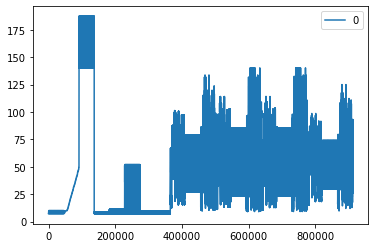

In [47]:
predict.plot()

In [ ]:
ids=pd.read_csv("test.csv",usecols=['id'])
sub=ids.join(predict)
sub.head()

In [ ]:
sub.to_csv('sample.csv',index=False)